In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [2]:
data_file = open("yelp_academic_dataset_user.json", encoding="utf8")
data = []
for line in data_file:
    data.append(json.loads(line))
user_df = pd.DataFrame(data)
data_file.close()

In [3]:
user_df[:5]

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [4]:
# importing libraries
import random
from nltk.corpus import names
import nltk

In [16]:
def gender_features(word):
    return {'last_letter':word[-1]}

In [11]:
nltk.download('names')
labeled_names = ([(name, 'male') for name in names.words('male.txt')]+[(name, 'female') for name in names.words('female.txt')])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\dusti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.


In [15]:
random.shuffle(labeled_names)

In [20]:
len(labeled_names)

7944

In [21]:
# we use the feature extractor to process the names data.
featuresets = [(gender_features(n), gender) 
               for (n, gender)in labeled_names]
featuresets

[({'last_letter': 't'}, 'male'),
 ({'last_letter': 'h'}, 'male'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'y'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'n'}, 'male'),
 ({'last_letter': 's'}, 'male'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'm'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 's'}, 'male'),
 ({'last_letter': 's'}, 'female'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'u'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'n'}, 'female'),
 ({'last_letter': 'r'}, 'male'),
 ({'last_letter': 'n'}, 'male'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'o'}, 'male'),
 ({'last_letter':

In [22]:
# Divide the resulting list of feature
# sets into a training set and a test set.
train_set, test_set = featuresets[500:], featuresets[:500]

In [25]:
# The training set is used to 
# train a new "naive Bayes" classifier.
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [41]:
for n in user_df.name[:10]:
    print(n, classifier.classify(gender_features(n)))

Walker male
Daniel male
Steph female
Gwen male
Karen male
Jane female
Rob male
Mike female
Rachelle female
John male


In [35]:
classifier.prob_classify(gender_features('carrie'))

<ProbDist with 2 samples>

In [43]:
# Trying another out of the box gender predictor
! pip install NameGenderPredictor

In [44]:
from NameGenderPredictor import predict_gender
print(predict_gender('Dustin'))

0.9933212428968686


In [45]:
for n in user_df.name[:10]:
    print(n, predict_gender(n))

Walker 0.9868239378279222
Daniel 0.9957543931210893
Steph 0.0
Gwen 0.009650101752773584
Karen 0.0028020806788902506
Jane 0.003042931088612622
Rob 1.0
Mike 0.9967740835132277
Rachelle 0.0011002408635403967
John 0.9957852975260119


In [58]:
len(labeled_names)

7944

In [89]:
preds = []
actuals = []
for i in labeled_names[:4000]:
    if predict_gender(i[0]) == None:
        preds.append(.5)
    else:
        preds.append(predict_gender(i[0]))
    actuals.append((i[1]))

In [90]:
preds

[1.0,
 1.0,
 0.08250174054304943,
 0.0,
 0.0,
 0.5,
 0.0,
 1.0,
 0.9947329711262426,
 0.9954680304014918,
 0.5241758241758242,
 0.0,
 0.5,
 0.998272884283247,
 1.0,
 0.0,
 0.9931793565762126,
 0.0,
 0.0,
 0.12556063867958378,
 0.0,
 0.5,
 0.9982398507523219,
 0.0,
 0.000345447008428907,
 1.0,
 0.5,
 1.0,
 0.9945358923570794,
 1.0,
 0.004446420631391729,
 0.0,
 0.0,
 0.9983471276752045,
 0.0,
 0.00047088197288595895,
 1.0,
 0.0,
 0.9877673861687324,
 0.13653023824068417,
 0.0,
 0.0010791635947900973,
 0.5,
 0.029808655316008646,
 1.0,
 0.02046617396247868,
 0.6204317877415652,
 0.0,
 0.0,
 0.5,
 1.0,
 0.0,
 0.5,
 0.0,
 1.0,
 0.25981981981981983,
 0.034312179739850214,
 0.0,
 0.0015608740894901144,
 0.0,
 0.0,
 0.5,
 0.0,
 0.090806750273546,
 0.0,
 0.17250049253689337,
 0.0,
 0.0,
 0.001192824700646878,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.9986103440289333,
 0.0,
 0.0,
 0.4244604316546763,
 1.0,
 0.0031946123294767743,
 0.8649193548387096,
 0.1713951447791752,
 0.0,
 0.5,
 0.5,
 0.0,
 0.9432

In [91]:
np.unique(actuals, return_counts=True)

(array(['female', 'male'], dtype='<U6'), array([2533, 1467], dtype=int64))

In [108]:
c = 0
performance = []
for i in range(len(preds)):
    if preds[c] > .5:
        if actuals[c] == 'male':
            performance.append(1)
        else:
            performance.append(0)
    else:
        performance.append(1)
    c+=1

In [109]:
# Performance of the model (assuming binary gender classification)
np.sum(performance)/4000

0.958

In [127]:
# preds = []
# for i in user_df.name:
#     try:
#         if predict_gender(i) == None:
#             preds.append(.5)
#         else:
#             preds.append(predict_gender(i))
#     except:
#         preds.append(.5)
# preds[1000:1020]

[0.9946923492627191,
 0.5,
 0.5,
 0.6944928840636778,
 0.9978124714082527,
 0.0,
 0.0013457656445256176,
 0.9951178073298501,
 0.0,
 0.002694408869585661,
 0.29679811061934086,
 0.9946907836949803,
 0.0027122628039238333,
 0.00355057619471909,
 0.00376987485838553,
 0.002661480192445491,
 0.0,
 0.9946907836949803,
 0.9957852975260119,
 0.9941192326308681]

In [128]:
# user_df['gender_score'] = np.array(preds)
# user_df

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,gender_score
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,55,56,18,232,844,467,467,239,180,0.986824
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,184,157,251,1847,7054,3131,3131,1521,1946,0.995754
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,10,17,3,66,96,119,119,35,18,0.000000
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,1,6,2,12,16,26,26,10,9,0.009650
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,0,0,0,1,1,0,0,0,0,0.002802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06 00:31:31,7,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,1.000000
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,2016-06-14 07:20:52,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0.003043
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,2017-02-04 15:31:58,1,1,0,,None,0,...,0,0,0,0,0,0,0,0,0,0.938528
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,2011-01-14 00:29:08,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [131]:
# user_df_slim = user_df[['user_id', 'name', 'gender_score']]
# user_df_slim

,user_id,name,gender_score
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,0.986824
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,0.995754
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,0.000000
3,SZDeASXq7o05mMNLshsdIA,Gwen,0.009650
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,0.002802
...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,1.000000
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,0.003043
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,0.938528
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,0.000000


In [132]:
#user_df_slim.to_csv('user_df_with_gender_scores.csv') #commenting out so it doesn't run unnecessarily

In [134]:
# Had to use feather format to compress
# user_df_slim.to_feather('user_df_gender_scores') #commenting out so it doesn't run unnecessarily

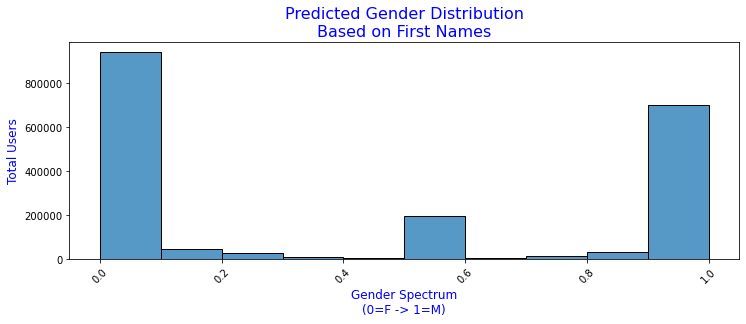

In [143]:
## Visualize yelper age over time

fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data=user_df_slim, x='gender_score', bins=10)

plt.title('Predicted Gender Distribution\nBased on First Names', color='b', size=16)
ax.set_ylabel('Total Users', color='b', size=12)
ax.set_xlabel('Gender Spectrum\n(0=F -> 1=M)', color='b', size=12)

plt.xticks(rotation=45)

plt.show()